#**Cleaning data**  

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#import dataset Titanic menggunakan pandas read_csv
titanic = pd.read_csv('/content/Titanic-Dataset.csv')
titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [3]:
#menampilkan statistik deskriptif dari data frame atau series
titanic.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [4]:
titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
#Cek nilai null pada kolom
titanic.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

karena Cabin mempunyai paling banyak null dan tidak digunakan, maka bisa untuk dihapus saja

In [6]:
titanic_cleaned = titanic.drop(['PassengerId', 'Name', 'Ticket', 'Cabin'], axis=1)
titanic_cleaned.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [7]:
titanic_cleaned.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [8]:
titanic_cleaned.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
Embarked      2
dtype: int64

kolom Cabin sudah berhasil dihapus

#**Data Visualization**

In [9]:
# Mengelompokkan berdasarkan kelas di kolom Survived, dan hitung jumlah kemunculan setiap grup.
survived_count = titanic.groupby('Survived')['Survived'].count()
survived_count

Survived
0    549
1    342
Name: Survived, dtype: int64

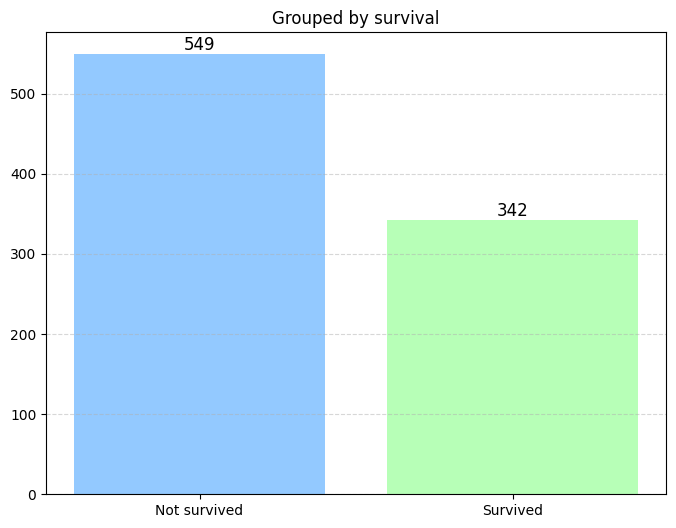

In [10]:
# figure size
plt.figure(figsize=(8, 6))

# Mendefinisikan warna
colors = ['#66b3ff', '#99ff99']

# Plot pada bar chart
bars = plt.bar(survived_count.index, survived_count.values, color=colors)

# judul chart
plt.title('Grouped by survival')

# menetapkan x-axis tick labels
plt.xticks([0, 1], ['Not survived', 'Survived'])

# Menambahkan nilai pada bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height,
             height, ha='center', va='bottom', fontsize=12, color='black')

# menyesuaikan tampilan bar
bars[0].set_alpha(0.7)
bars[1].set_alpha(0.7)

# menambahkan grid
plt.grid(axis='y', linestyle='--', alpha=0.5)

plt.show()

In [11]:
# Mengelompokkan berdasarkan kelas di kolom Sex, dan hitung jumlah kemunculan setiap grup.
sex_count = titanic.groupby('Sex')['Sex'].count()
sex_count

Sex
female    314
male      577
Name: Sex, dtype: int64

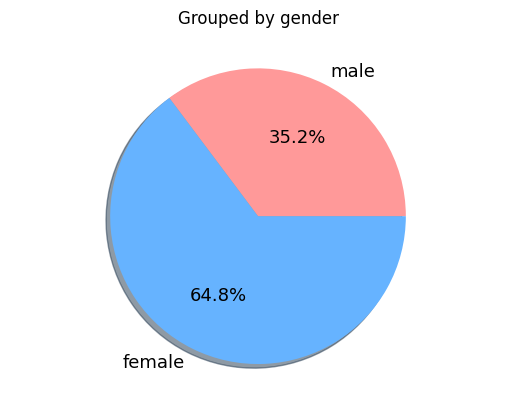

In [12]:
plt.axis('equal') #membuat diagram pie menjadi lingkaran sempurna
plt.title('Grouped by gender')

#mendefinisikan warna
colors = ['#ff9999', '#66b3ff']
plt.pie(sex_count.values,
        labels=['male', 'female'],
        autopct='%1.1f%%',
        textprops={'fontsize':13},
        colors = colors,
        shadow = True)
plt.show()

In [13]:
# Mengelompokkan berdasarkan kelas di kolom pclass, dan hitung jumlah kemunculan setiap grup.
pclass_count = titanic.groupby('Pclass')['Pclass'].count()
pclass_count

Pclass
1    216
2    184
3    491
Name: Pclass, dtype: int64

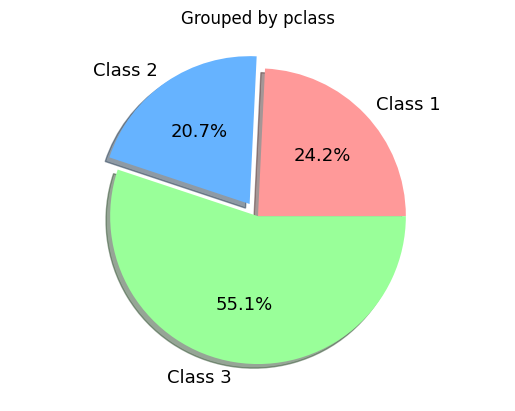

In [14]:
plt.axis('equal') #membuat diagram pie menjadi lingkaran sempurna
plt.title('Grouped by pclass')

# Mendefinsikan warna
colors = ['#ff9999', '#66b3ff', '#99ff99']

# Menentukan explode
explode = (0, 0.1, 0)
plt.pie(pclass_count.values,
        labels=['Class 1', 'Class 2', 'Class 3'],
        autopct='%1.1f%%',
        textprops={'fontsize':13},
        colors = colors,
        explode = explode,
        shadow = True)
plt.show()

In [15]:
# Mengelompokkan berdasarkan kelas di kolom Embarked, dan hitung jumlah kemunculan setiap grup.
embark_count = titanic.groupby('Embarked')['Embarked'].count()
embark_count

Embarked
C    168
Q     77
S    644
Name: Embarked, dtype: int64

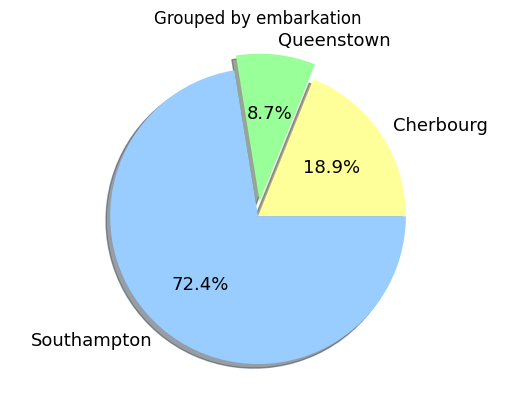

In [16]:
plt.axis('equal') #membuat diagram pie menjadi lingkaran sempurna
plt.title('Grouped by embarkation')

# Mendefinsikan warna
colors = ['#ffff99', '#99ff99', '#99ccff']

# Menentukan explode
explode = (0, 0.1, 0)

plt.pie(embark_count.values,
        labels=['Cherbourg', 'Queenstown', 'Southampton'],
        autopct='%1.1f%%',
        textprops={'fontsize':13},
        colors = colors,
        explode = explode,
        shadow = True)
plt.show()